# hwseqsearch_localblast
Ryan Byrne

In [59]:
#Imports
from Bio.Blast import NCBIXML
import re

#Parse blast results file
file = open('query_ptn.blast.pdb.xml', 'r') 
blast_records = NCBIXML.parse(file)

# Print the name of the top protein hit.

In [137]:
#Base values
TopTitle = ''
score = 0
#Find the alignment with the highest score by comparing current score to highest recorded score
#If score is higher update score and set title output
for alignment in blast_record.alignments:
    if alignment.hsps[0].score > score:
        score = alignment.hsps[0].score
        TopTitle = alignment.title

#Indexing to remove extra information from the alignment title
firstHit = TopTitle.split('>')[0]
tophitcut = firstHit.split('|')
protein = tophitcut[2].split('[')[0]

print(protein)

A Chain A, 3C-like proteinase 


# Print a unique list of species names of all the hits.

In [139]:
#Create list for storying species names
speciesList = []
#Iterate through alignments and use regular expression to index specifically species names
#by looking at species within the brackets
for alignment in blast_record.alignments:
    FullAlign = alignment.title
    res = re.findall(r'\[.*?\]', FullAlign)
    #Since multiple results come from all things within brackets check to see if it makes sense as a species name
    #and check to see if the species is already in the list
    for species in res:
        if species[1:-1] not in speciesList:
            if species[1] != '(':
                speciesList.append(species[1:-1])

print(speciesList)

['Severe acute respiratory syndrome coronavirus 2', 'Severe acute respiratory syndrome coronavirus', 'Severe acute respiratory syndrome-related coronavirus', 'SARS coronavirus BJ162', 'SARS coronavirus Sin2774', 'SARS coronavirus Urbani', 'SARS coronavirus BJ01', 'unidentified', 'Middle East respiratory syndrome-related coronavirus', 'Betacoronavirus England 1', 'Tylonycteris bat coronavirus HKU4', 'Murine hepatitis virus strain A59', 'Human coronavirus HKU1 (isolate N1)', 'Porcine epidemic diarrhea virus', 'Porcine epidemic diarrhea virus CV777', 'Feline infectious peritonitis virus', 'Transmissible gastroenteritis virus', 'Porcine transmissible gastroenteritis coronavirus strain Purdue', 'Feline infectious peritonitis virus (strain 79-1146)', 'Human coronavirus NL63', 'SARS coronavirus Sino1-11', 'Human coronavirus 229E', 'Infectious bronchitis virus', 'Shewanella oneidensis MR-1', 'Shewanella oneidensis', 'Mycolicibacterium smegmatis', 'Paenibacillus glycanilyticus', 'Escherichia co

# Find the top scoring hit with a mouse protein. Print the local sequence alignment of the query with this mouse protein.

In [144]:
mouse_Pro_Score = {}
#Iterate through alignments and finding ones that are from the species mus musculus or house mouse
# Store all scores for mouse proteins in a dictionary to story alignment object
for alignment in blast_record.alignments: 
    if 'Mus musculus' in alignment.title:
        mouse_Pro_Score[alignment.hsps[0].score] = alignment

#find the max score at output the local alignment
Top_Score_Align = mouse_Pro_Score[max(mouse_Pro_Score)]
print(Top_Score_Align.hsps[0])

Score 64 (29 bits), expectation 7.8e+00, alignment length 71
Query:      15 GCMVQVTCGTTTLNGL-WLDDVVYCPRHVICTSEDMLNPNYEDLL...MQN 84
                C   +TC +  L+G  W ++  +CP H  C       P  +DL ...+Q 
Sbjct:     123 ACHSSLTCKSNWLHGWDWSEEKKHCPAHEPCLPFSYHFPTPDDLC...LQK 190


# In each hit, use the first HSP (ignore the remaining HSPS in each hit for this assignment). Show a histogram of percent identities of the first HSPs from all the hits.

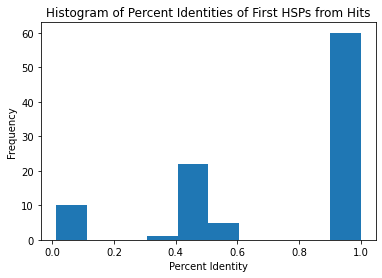

98

In [118]:
import matplotlib.pyplot as plt

#Store percent identies
Percent_Iden = []

#For each alignment calculate percent identy by diving identities by total sequence length
for alignment in blast_record.alignments: 
    hsp = alignment.hsps[0]
    Percent_Iden.append(hsp.identities/alignment.length)

#Create histogram
plt.hist(Percent_Iden)
plt.xlabel('Percent Identity')
plt.ylabel('Frequency')
plt.title('Histogram of Percent Identities of First HSPs from Hits')
plt.show() 
